## Question 6: Calculate a “tacked” set of variables depending on the tack of the boat, so that sailors don’t need to think about what tack they’re on when looking at measurements. And show the results in a visualisation.

**dataframe named tacked is created. This includes the same variables as the main data_BOAT but the ANGLES(CA1-6), TWIST and ROT, TWA, AWA, LEEWAY, HEEL as transformed in order to**

ANGLES and ROT (-) means towards windward side

Twist(+) means the top is more open

heel (-) --> heeling to windward -  negative heel

Leeway (+) --> drifting

**10s downsampling is used**

In [1]:
### Imports and re-used functions

import pandas as pd
import numpy as np
from scipy.stats import circmean
import matplotlib.pyplot as plt
import seaborn as sns

# Read a boat's data
csv_path = r'C:\Users\matsa\OneDrive\Υπολογιστής\SailGP\SGP Data challenge VS\SGP_Data_Challenge\Data\Boat_logs\data_AUS.csv'

data = pd.read_csv(csv_path)
data["DATETIME"] = pd.to_datetime(data["DATETIME"])
data.set_index("DATETIME", inplace=True)


##Used the downsampled data##

# Define a function for rolling circular mean
def rolling_circmean(data, window):
    return data.rolling(window=window).apply(lambda x: circmean(x, high=360, low=0), raw=True)
#Downsampling using the resample - every 10s. Keeping the first value of each 10s period & droping NAs.
data=data.resample("10s").first().dropna()

In [2]:
#function to define  and adjust the variables that need to be adjusted for tacks
def adjust_angles(df):
    adjusted_df=df.copy()
    # Define the columns whose signs need to be changed
    angle_columns = [
        'TWA_SGP_deg', 'AWA_SGP_deg','LEEWAY_deg',
        'ANGLE_CA1_deg', 'ANGLE_CA2_deg', 'ANGLE_CA3_deg', 'ANGLE_CA4_deg', 
        'ANGLE_CA5_deg', 'ANGLE_CA6_deg', 'ANGLE_WING_TWIST_deg', 'ANGLE_WING_ROT_deg','HEEL_deg'
    ]
    #Add a column to keep the record of the tack 
    adjusted_df['tack']=np.where(adjusted_df['TWA_SGP_deg'] < 0, 'P', 'S')
    
    # Apply the sign change conditionally for each row where P tack--> TWA_SGP_deg < 0
    mask = adjusted_df['TWA_SGP_deg'] < 0
    adjusted_df.loc[mask, angle_columns] = adjusted_df.loc[mask, angle_columns] * -1
    adjusted_df['RATE_YAW_deg_s_1'] = adjusted_df['RATE_YAW_deg_s_1'].abs()  # YAW rate sign depends on whether turning clock or anti clock wise, so decided to get its absolute value

    return adjusted_df

In [3]:
data[['TWA_SGP_deg','ANGLE_CA1_deg', 'ANGLE_CA2_deg', 'ANGLE_CA3_deg', 'ANGLE_CA4_deg', 
        'ANGLE_CA5_deg', 'ANGLE_CA6_deg', 'ANGLE_WING_TWIST_deg', 'ANGLE_WING_ROT_deg','RATE_YAW_deg_s_1', 'HEEL_deg'
    ]][241:250]

,TWA_SGP_deg,ANGLE_CA1_deg,ANGLE_CA2_deg,ANGLE_CA3_deg,ANGLE_CA4_deg,ANGLE_CA5_deg,ANGLE_CA6_deg,ANGLE_WING_TWIST_deg,ANGLE_WING_ROT_deg,RATE_YAW_deg_s_1,HEEL_deg
DATETIME,,,,,,,,,,,


In [4]:
tacked=adjust_angles(data)

In [5]:
tacked[['tack','TWA_SGP_deg','ANGLE_CA1_deg', 'ANGLE_CA2_deg', 'ANGLE_CA3_deg', 'ANGLE_CA4_deg', 
        'ANGLE_CA5_deg', 'ANGLE_CA6_deg', 'ANGLE_WING_TWIST_deg', 'ANGLE_WING_ROT_deg','RATE_YAW_deg_s_1', 'HEEL_deg']][241:250]


,tack,TWA_SGP_deg,ANGLE_CA1_deg,ANGLE_CA2_deg,ANGLE_CA3_deg,ANGLE_CA4_deg,ANGLE_CA5_deg,ANGLE_CA6_deg,ANGLE_WING_TWIST_deg,ANGLE_WING_ROT_deg,RATE_YAW_deg_s_1,HEEL_deg
DATETIME,,,,,,,,,,,,


In [6]:
def plot_xy_graphs(tacked):
    # Define the columns for the plot
    columns_to_plot = ['TWA_SGP_deg','ANGLE_CA1_deg', 'ANGLE_CA2_deg', 'ANGLE_CA3_deg', 'ANGLE_CA4_deg', 
        'ANGLE_CA5_deg', 'ANGLE_CA6_deg', 'ANGLE_WING_TWIST_deg', 'ANGLE_WING_ROT_deg','RATE_YAW_deg_s_1', 'HEEL_deg']
    
    # Create XY plots for each of the columns
    for column in columns_to_plot:
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=tacked, x='TWA_SGP_deg', y=column, hue='tack', palette='deep')
        plt.title(f'XY Plot: {column} vs TWA')
        plt.ylabel(column)
        plt.xlabel('TWA')
        plt.grid(True)
    plt.show()

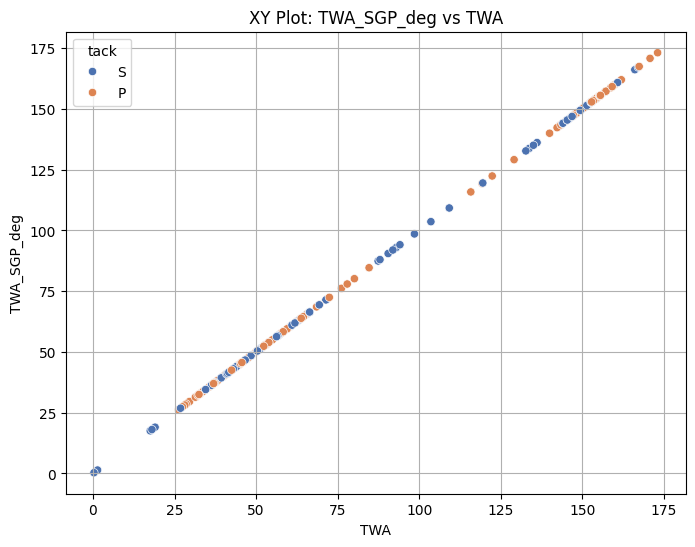

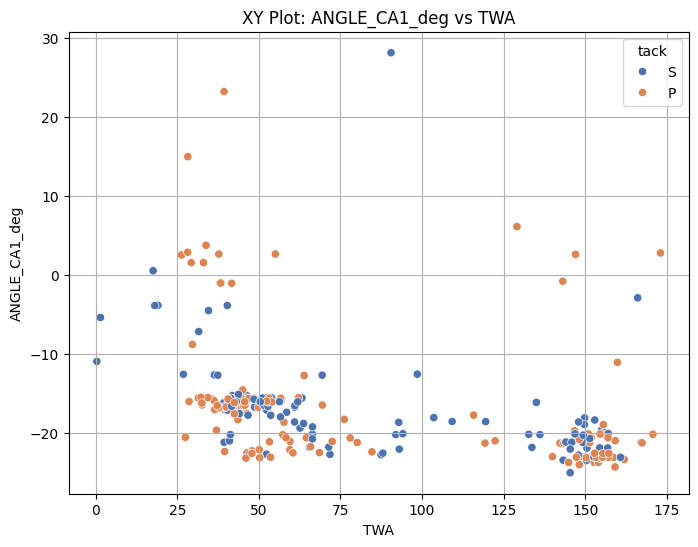

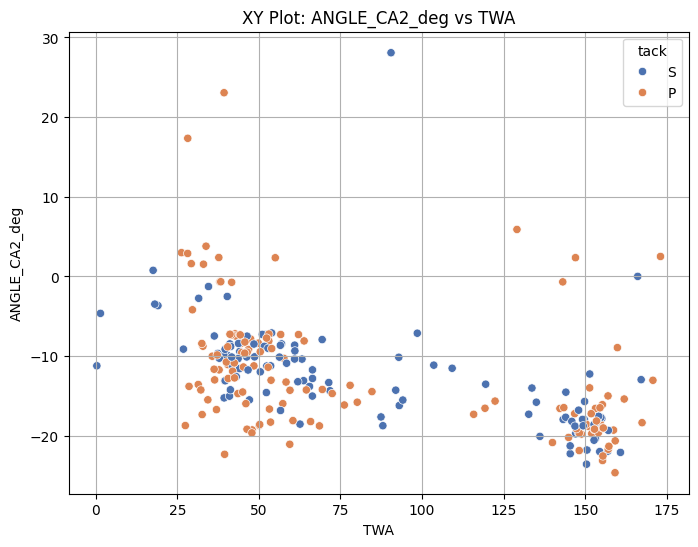

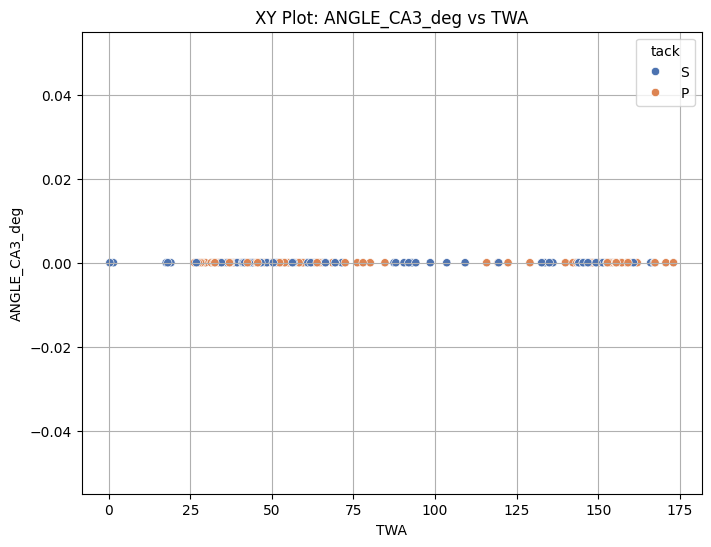

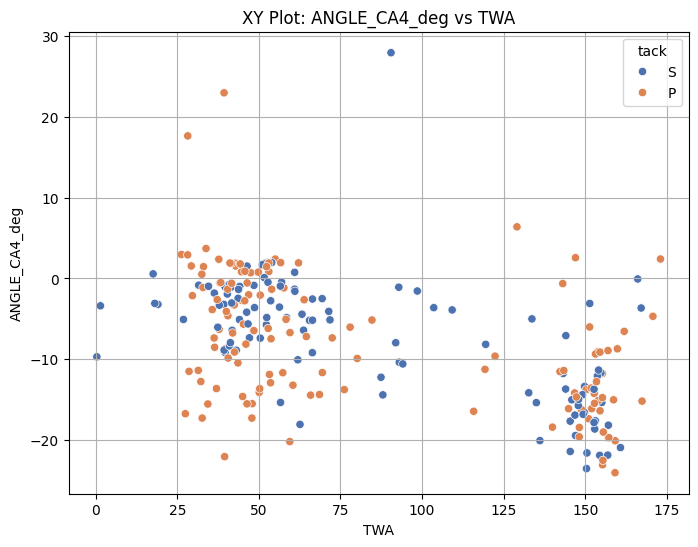

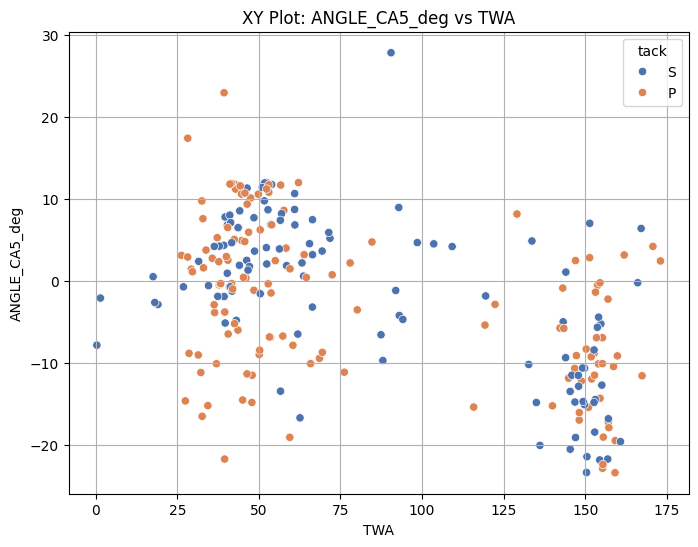

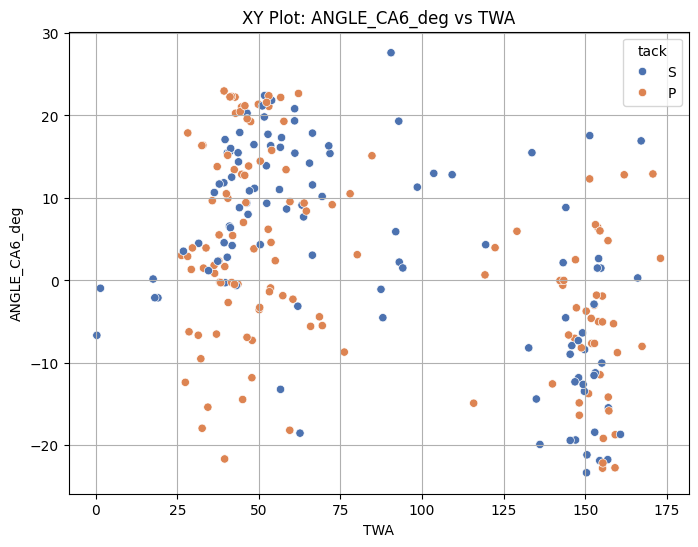

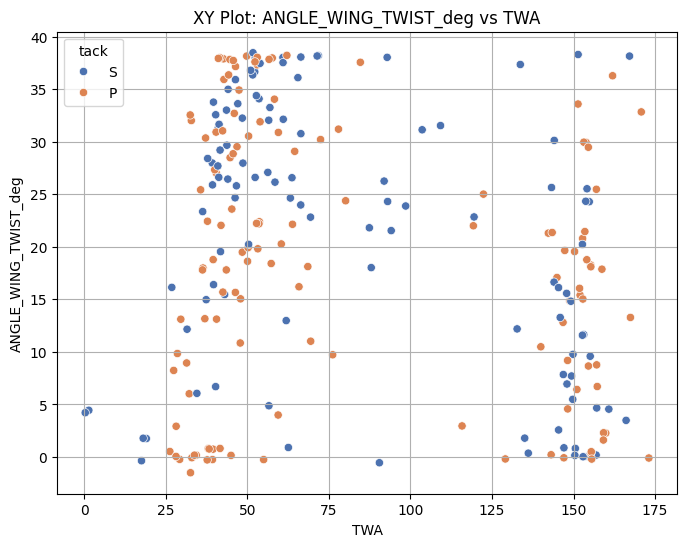

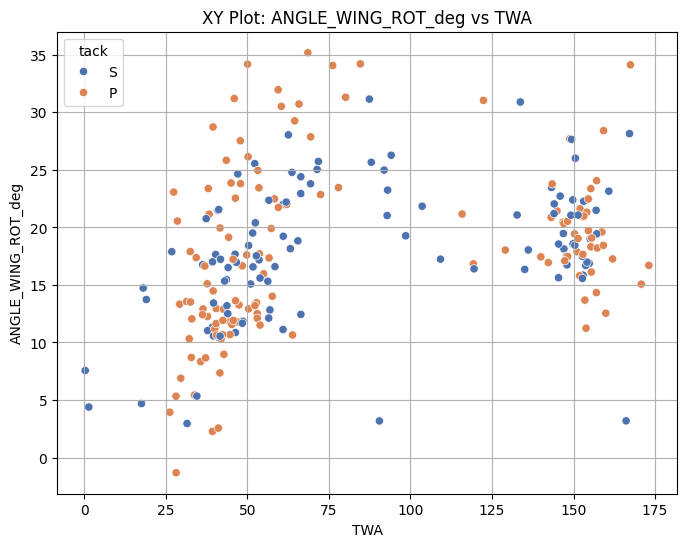

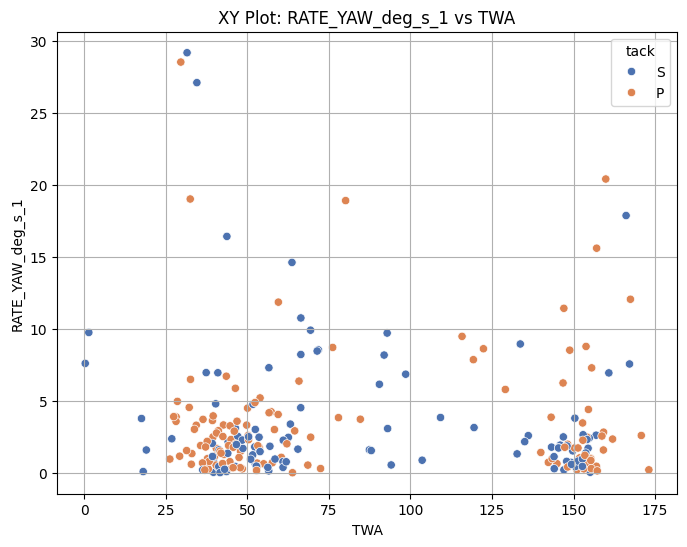

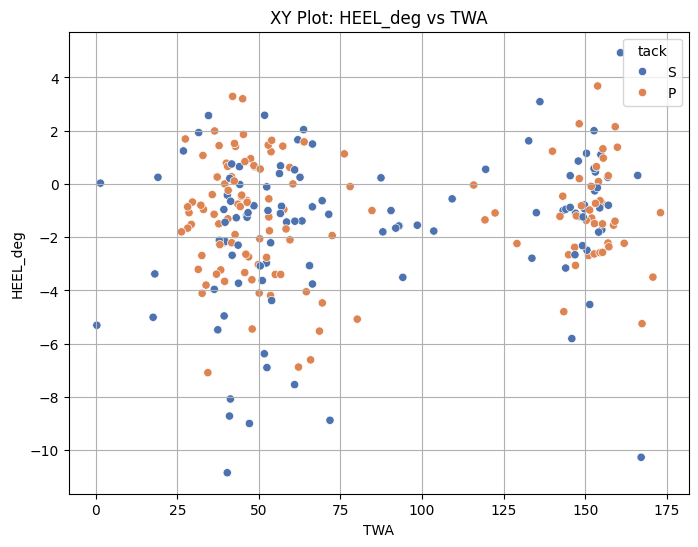

In [7]:
plot_xy_graphs(tacked)
